<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ford-GoBike-System-Data" data-toc-modified-id="Ford-GoBike-System-Data-1">Ford GoBike System Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#by-Joel-Minier-Matar" data-toc-modified-id="by-Joel-Minier-Matar-1.0.1">by Joel Minier-Matar</a></span></li></ul></li><li><span><a href="#Investigation-Overview" data-toc-modified-id="Investigation-Overview-1.1">Investigation Overview</a></span></li><li><span><a href="#Dataset-Overview" data-toc-modified-id="Dataset-Overview-1.2">Dataset Overview</a></span></li><li><span><a href="#Type-of-users" data-toc-modified-id="Type-of-users-1.3">Type of users</a></span></li><li><span><a href="#Trip-duration" data-toc-modified-id="Trip-duration-1.4">Trip duration</a></span></li><li><span><a href="#Peak-hours:-Weekdays-vs-Weekend" data-toc-modified-id="Peak-hours:-Weekdays-vs-Weekend-1.5">Peak hours: Weekdays vs Weekend</a></span></li><li><span><a href="#Most-popular-stations" data-toc-modified-id="Most-popular-stations-1.6">Most popular stations</a></span></li><li><span><a href="#Market-st.-station:-Distribution-throughout-the-day" data-toc-modified-id="Market-st.-station:-Distribution-throughout-the-day-1.7">Market st. station: Distribution throughout the day</a></span></li><li><span><a href="#San-Francisco-Caltrain-station:-Distribution-throughout-the-day" data-toc-modified-id="San-Francisco-Caltrain-station:-Distribution-throughout-the-day-1.8">San Francisco Caltrain station: Distribution throughout the day</a></span></li><li><span><a href="#Monthly-Trends" data-toc-modified-id="Monthly-Trends-1.9">Monthly Trends</a></span></li><li><span><a href="#Group-of-users-per-day" data-toc-modified-id="Group-of-users-per-day-1.10">Group of users per day</a></span></li></ul></li></ul></div>

# Ford GoBike System Data
###    by Joel Minier-Matar

## Investigation Overview

> For this study we will be looking at the Ford GoBike system data for a full year from the beginning of April 2019 to the end of March 2020, over 2 million records will be analyzed to identify trends and patterns on the system users.

## Dataset Overview

> The ford wheels dataset contains information about bicycle rides for subscribers and customer. The set has the duration for each ride as well as the starting and ending stations. 

In [59]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [60]:
#creating filename list to load files into pandas
data_to_download=['201904','201905','201906','201907','201908','201909','201910','201911','201912','202001','202002','202003']
filenames=[]
for file_date in data_to_download:
    if int(file_date)<201905: #adjusting filenames to account for file name change
        name='fordgobike'
    else:
        name='baywheels'
    filenames.append(file_date+'-'+name+'-tripdata.csv')

#loading all the data files into a single dataframe
df=pd.DataFrame()
for name in filenames:    
    data=pd.read_csv("data/"+name)
    df=pd.concat([df,data])

In [61]:
df=df[df['duration_sec']<=4060]
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)
df['hour']=df['start_time'].dt.hour
df['weekday']=df['start_time'].dt.day_name()
df['weekday']=df['weekday'].astype('category')
df.weekday.cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, inplace=True)
df['period']=df['start_time'].dt.month_name()+'-'+(pd.DatetimeIndex(df['start_time']).year).astype(str)
#removing data from April 2020, since we only have few days from April in the March datafile
df=df[df['period']!='April-2020']
df['period']=df['period'].astype('category')
#Setting order for the period category
df.period.cat.reorder_categories(['April-2019', 'May-2019', 'June-2019', 'July-2019', 'August-2019', 'September-2019', 'October-2019', 'November-2019', 'December-2019', 'January-2020', 'February-2020', 'March-2020'], ordered=True, inplace=True)
df.user_type=df.user_type.astype('category')
df.bike_share_for_all_trip=df.bike_share_for_all_trip.astype('category')
df.rental_access_method=df.rental_access_method.astype('category')
#Setting order for the user_type categories
df.user_type.cat.reorder_categories(['Subscriber','Customer'], ordered=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750723 entries, 4 to 176798
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  hour                     int64         
 16  weekday                  category      
 17  period                   cat

## Type of users

> From the bike system users, over the year in consideration, 73% of the users are subscribers while 27% are customer

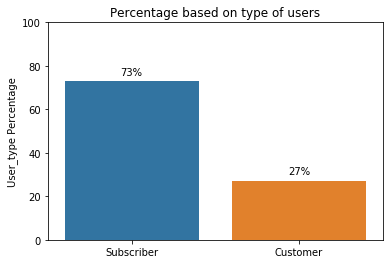

In [71]:
typepercent=df.user_type.value_counts(normalize=True).apply(lambda x: x*100) #Normalizinmg the counts and transforming to percentage
fig, ax = plt.subplots(1,1)
sns.barplot(x=typepercent.index,y=typepercent)
plt.ylim(0,100)
plt.ylabel('User_type Percentage')
plt.title("Percentage based on type of users")
rects=ax.patches
for rect in rects:
    h = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2., h+2,'{:0.0f}%'.format(h), ha='center', va='bottom');

## Trip duration

> The histogram for the time duration of each ride shows that an average duration of around 700 seconds (11-12 min) and it shows an exponential decline towards higher values.

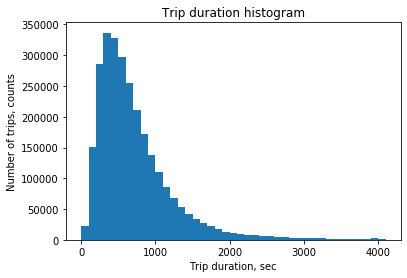

In [63]:
bin_edges = np.arange(0, df['duration_sec'].max()+100, 100)
plt.hist(df['duration_sec'], bins = bin_edges)
plt.xlabel('Trip duration, sec')
plt.ylabel('Number of trips, counts')
plt.title('Trip duration histogram');

## Peak hours: Weekdays vs Weekend

> The histogram based on the hour of the day shows a bimodal distribution. The peak times for bike rides are in the morning between 7-10 am and in the evening between 4-7 pm. 

> Weekdays trend are very similar to the overall trend; however, weekend trends are different. The weekend distribution is unimodal with peak rides in the early afternoon (2-3 pm). The data also showed less trips compared to weekdays.


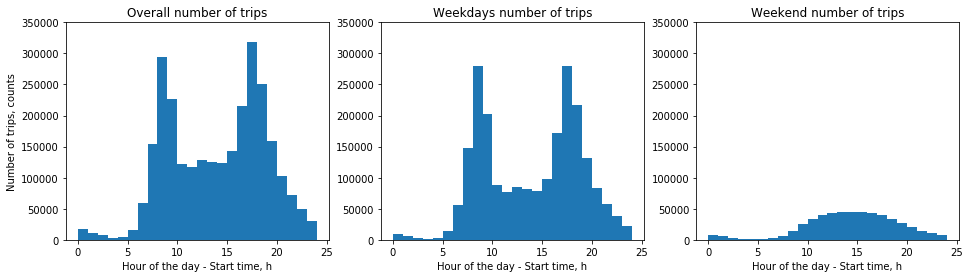

In [64]:
plt.figure(figsize = [16,4])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
plt.subplot(1, 3, 1)
plt.hist(df.start_time.dt.hour, bins=bin_data)
plt.xlabel('Hour of the day - Start time, h')
plt.title("Overall number of trips")
plt.ylabel('Number of trips, counts')
plt.ylim(0,350000);
plt.subplot(1, 3, 2)
plt.hist(df.query('weekday!="Sunday" and weekday!="Saturday"')['hour'], bins=bin_data)
plt.xlabel('Hour of the day - Start time, h')
plt.title("Weekdays number of trips")
plt.ylim(0,350000);
plt.subplot(1, 3, 3)
plt.hist(df.query('weekday=="Sunday" or weekday=="Saturday"')['hour'], bins=bin_data)
plt.xlabel('Hour of the day - Start time, h')
plt.title("Weekend number of trips")
plt.ylim(0,350000);


## Most popular stations

> Market St, Berry St and San Francisco Caltrain stations are the most popular stations to start a ride. Identifying the most popular stations could be helpful to know the main locations where bikes are needed.

In [65]:
stations=df['start_station_name'].value_counts().rename_axis('start_station_name').reset_index(name='counts')
station_10_start=stations.head(10)
stations_end=df['end_station_name'].value_counts().rename_axis('end_station_name').reset_index(name='counts')
station_10_end=stations_end.head(10)

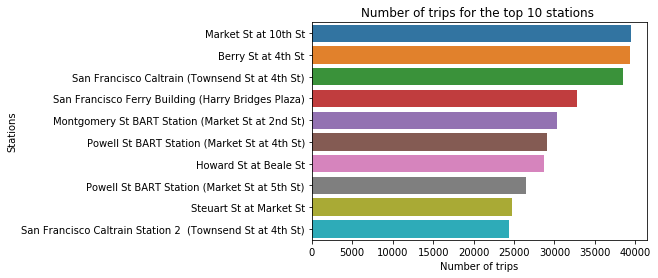

In [66]:
sns.barplot(data=station_10_start,y='start_station_name',x='counts', order=station_10_start.start_station_name)
plt.xlabel('Number of trips')
plt.title("Number of trips for the top 10 stations ")
plt.ylabel('Stations');

## Market st. station: Distribution throughout the day

> The ride distribution over the day is similar between the bikes leaving the station (left plot) and the returning rides (right plot); which helps in balancing the number of bikes in the station.

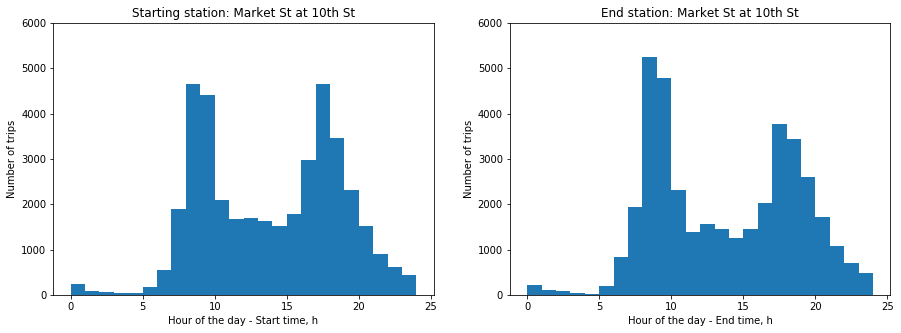

In [67]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df[df.start_station_name==station_10_start.start_station_name[0]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[0])
plt.xlabel('Hour of the day - Start time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,6000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df[df.end_station_name==station_10_end.end_station_name[4]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[4])
plt.xlabel('Hour of the day - End time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,6000);

## San Francisco Caltrain station: Distribution throughout the day

> For this station, the ride distribution over the day showed that more bikes are usually returned to the station (right plot) compared to those leaving (left plot); which could translated to additional bikes in the station.

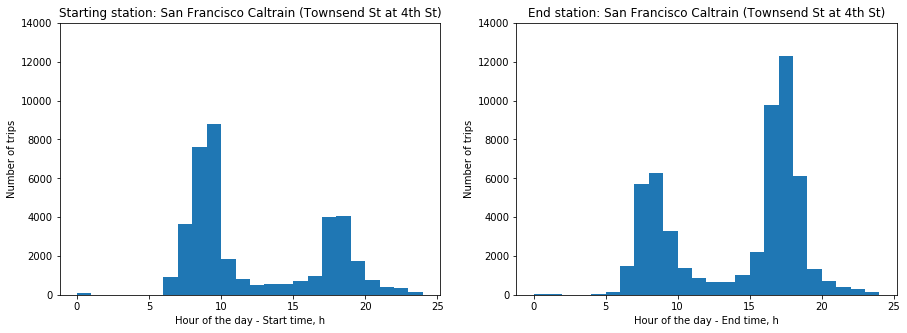

In [68]:
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()[0]
bin_data=range(0,25,1)
# left plot
plt.subplot(1, 2, 1)
plt.hist(df[df.start_station_name==station_10_start.start_station_name[2]]['start_time'].dt.hour, bins=bin_data);
plt.title('Starting station: ' + station_10_start.start_station_name[2])
plt.xlabel('Hour of the day - Start time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,14000)
# right plot
plt.subplot(1, 2, 2)
plt.hist(df[df.end_station_name==station_10_end.end_station_name[0]]['end_time'].dt.hour, bins=bin_data)
plt.title('End station: '+station_10_end.end_station_name[0])
plt.xlabel('Hour of the day - End time, h')
plt.ylabel ('Number of trips')
plt.ylim(0,14000);

## Monthly Trends

> The ride distribution per month showed similar number of rides across the months with lower rides in December, possible due to the Christmas holidays; and in March 2020 probably due to the COVID-19 lock-down.

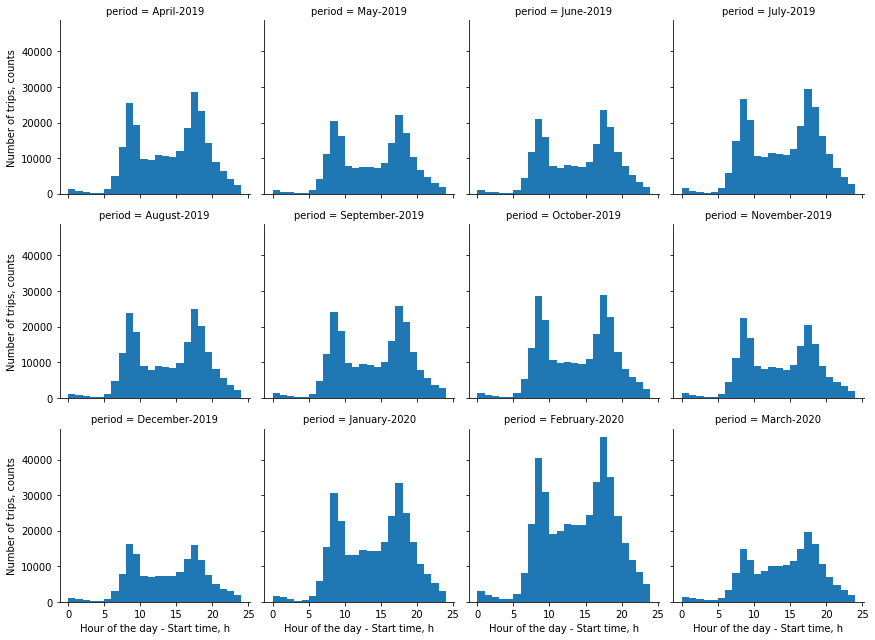

In [69]:
bin_data=range(0,25,1)
g = sns.FacetGrid(data =df, col = 'period', col_wrap=4)
g.map(plt.hist,'hour',bins=bin_data)
g.axes[8].set_xlabel('Hour of the day - Start time, h')
g.axes[9].set_xlabel('Hour of the day - Start time, h')
g.axes[10].set_xlabel('Hour of the day - Start time, h')
g.axes[11].set_xlabel('Hour of the day - Start time, h')
g.axes[0].set_ylabel('Number of trips, counts')
g.axes[4].set_ylabel('Number of trips, counts')
g.axes[8].set_ylabel('Number of trips, counts');

## Group of users per day

> The data showed that subscribers are the main users of the system, specially during weekdays. On Weekend, the subscriber users are less compared to weekdays, but still higher than the customer users.


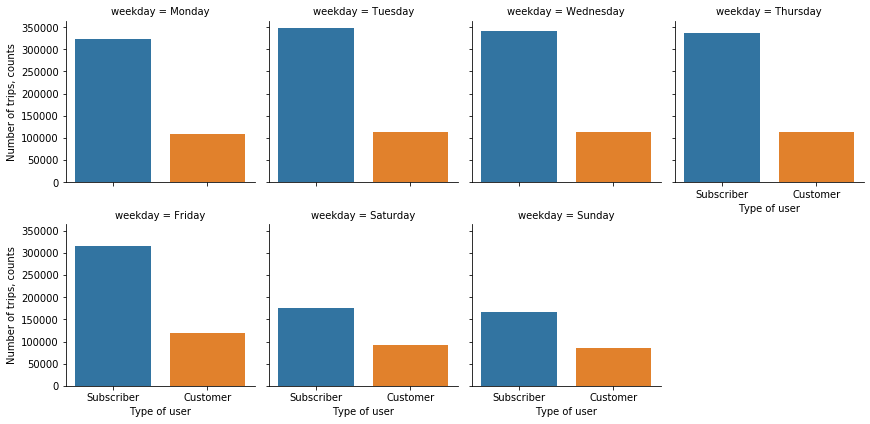

In [70]:
g = sns.FacetGrid(data = df, col = 'weekday',col_wrap=4)
g.map(sns.countplot,'user_type', order=['Subscriber','Customer'],palette=sns.color_palette())
g.axes[3].set_xlabel('Type of user')
g.axes[4].set_xlabel('Type of user')
g.axes[5].set_xlabel('Type of user')
g.axes[6].set_xlabel('Type of user')
g.axes[0].set_ylabel('Number of trips, counts')
g.axes[4].set_ylabel('Number of trips, counts');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!